### Predictive Maintenance (Anomaly detection/ Binary classification)
- Objective: product quality (pass/fail)
- Key Issues: High Dimensionality (# of parameter > # of data point) & Imbalanced
- Evaluation metrics: F1-score 

### Tips 
- Feature selection or Dimension Reduction approach should be done
- Can view the problem as time series or not time series data to process

In [17]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
os.getcwd()

'G:\\我的雲端硬碟\\碩二\\Introductoin to Artificial Intelligent\\HW\\HW3\\Yang Hui'

In [18]:
df = pd.read_csv(r'./hw3_train.csv')
print(df.shape)
df.head()

(1097, 592)


,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,7/19/2008 11:55,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,0
1,7/19/2008 12:32,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,0
2,7/19/2008 13:17,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,7/19/2008 14:43,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,0
4,7/19/2008 15:22,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,0


In [19]:
df = df.fillna(df.mean())

In [20]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1097.000000,1097.000000,1097.000000,1097.000000,1097.00000,1097.0,1097.000000,1097.000000,1097.000000,1097.000000,...,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000,1097.000000
mean,3011.881567,2494.376108,2199.010628,1370.544388,1.29402,100.0,101.451203,0.122370,1.474269,-0.001262,...,92.040103,0.500047,0.015543,0.003910,3.115248,0.021082,0.016259,0.005212,98.549232,0.071103
std,65.783969,83.959426,30.616505,370.396711,0.37914,0.0,4.510102,0.001934,0.068084,0.014789,...,46.656841,0.003566,0.020313,0.004409,4.234162,0.011148,0.008047,0.002543,89.182654,0.257114
min,2743.240000,2158.750000,2060.660000,847.797600,0.68150,100.0,83.423300,0.116000,1.191000,-0.053400,...,0.000000,0.477800,0.006500,0.001700,1.284500,-0.004200,0.004200,0.001500,0.000000,0.000000
25%,2967.400000,2450.050000,2180.377800,1070.043900,1.01770,100.0,99.217800,0.121100,1.428100,-0.010900,...,92.040102,0.497700,0.011500,0.003100,2.297900,0.013100,0.010600,0.003400,44.368600,0.000000
50%,3010.300000,2497.030000,2199.633400,1288.085700,1.31010,100.0,101.864400,0.122200,1.471100,-0.001200,...,92.040102,0.500100,0.013700,0.003600,2.741000,0.020200,0.014900,0.004600,72.377600,0.000000
75%,3055.870000,2538.430000,2218.055500,1600.385800,1.49050,100.0,104.415600,0.123800,1.525000,0.008500,...,92.040102,0.502400,0.016400,0.004100,3.284400,0.027700,0.020300,0.006400,114.412700,0.000000
max,3266.040000,2846.440000,2315.266700,3715.041700,3.88940,100.0,111.890000,0.128600,1.656400,0.046800,...,706.824000,0.509800,0.476600,0.104500,99.303200,0.058400,0.060700,0.018800,706.824000,1.000000


### Also have imbalance data issue
- tips: sampling, reweighting, distribution based approach (binary classification)
- view the problem as an anomaly detection problem
- [Imbalanced data API reference](https://imbalanced-learn.org/stable/references/index.html#api)

Imbalanced Ratio: 13.064
Minority: 78
Majority: 1019


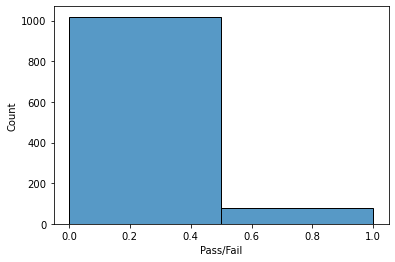

In [21]:
# Imbalanced Data 
import seaborn as sns
sns.histplot(df['Pass/Fail'], bins=2)

#Check the imbalanced ratio
print('Imbalanced Ratio:', round((len(df[df['Pass/Fail'] == 0]) / len(df[df['Pass/Fail'] == 1])),3))
print('Minority:',len(df[df['Pass/Fail'] == 1]))
print('Majority:',len(df[df['Pass/Fail'] == 0]))

### Use all features

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
le = LabelEncoder()
df['Time'] = le.fit_transform(df['Time'])
df['Pass/Fail'] = le.fit_transform(df['Pass/Fail'])

X = df[df.columns[0:-1]]
X = MinMaxScaler().fit_transform(X)
y = df[df.columns[-1]]

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score as AUC
model = XGBClassifier()
model.fit(X,y)

df_test = pd.read_csv(r'./hw3_test.csv')
df_test = df_test.fillna(df_test.mean())
df_test['Time'] = le.fit_transform(df_test['Time'])

X_test = df_test
X_test = MinMaxScaler().fit_transform(X_test)
y_pred = model.predict_proba(X_test)

df_true = pd.read_csv(r'./hw3_solution.csv')
y_true = df_true['Pass/Fail']

AUC(y_true, y_pred[:,1])

[10:39:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.5168539325842697

### Feature selection approach
- filter 
- wrapper
- embedding
- hybrid

Text(0.5, 0, 'Xgboost Feature Importance')

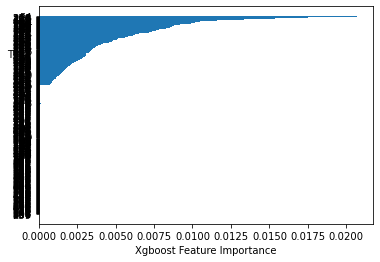

In [24]:
# Feature Selection 
from matplotlib import pyplot as plt
sorted_idx = model.feature_importances_.argsort()
plt.barh(df.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Xgboost Feature Importance")

### Model Train

In [25]:
df = pd.read_csv(r'./hw3_train.csv')
df = df.fillna(df.mean())
le = LabelEncoder()
df['Time'] = le.fit_transform(df['Time'])
df['Pass/Fail'] = le.fit_transform(df['Pass/Fail'])

# feature selection
features = df.columns[sorted_idx[ :320]]
X = df[features]
X = MinMaxScaler().fit_transform(X)
y = df[df.columns[-1]]

model = XGBClassifier()
model.fit(X,y)

# remember to evaluate your model performance


[10:39:57] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Prediction

In [26]:
df_test = pd.read_csv(r'./hw3_test.csv')
# same procedure done in training step
df_test = df_test.fillna(df_test.mean())
df_test['Time'] = le.fit_transform(df_test['Time'])

X_test = df_test[features]
X_test = MinMaxScaler().fit_transform(X_test)
y_pred = model.predict(X_test)

In [27]:
pred_rlt = pd.DataFrame(y_pred, columns=['Pass', 'Fail'])
pred_rlt.head()

,Pass,Fail
0,0.986293,0.013707
1,0.948223,0.051777
2,0.986887,0.013113
3,0.993430,0.006570
4,0.997547,0.002453


### Output result and submit onto kaggle

In [28]:
pred_rlt.to_csv('mySubmission.csv', index_label='Id')

### Anomaly detection approach ```roc_auc_curve``` measurement
- used to determine the ```best anomaly threshold```
    1. : get the anomaly score for each data point
    2. : set up the anomaly_threshold and get the confusion matrix
    3. : use confusion matrix to get false positive and true negative
    4. : plot AUC_ROC curve to determine anomaly_threshold
- ```f1 score``` procedure is similar to ```roc_auc_curve```

auc: 0.2
best_threshold: 2.611


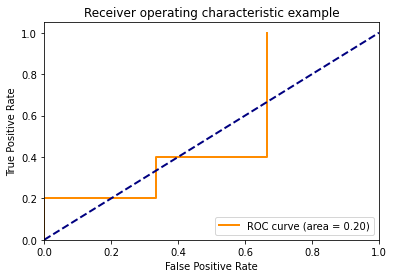

In [8]:
from sklearn.metrics import confusion_matrix, auc
import numpy as np
import matplotlib.pyplot as plt

def get_auc_score(y_true, y_score, num_eval=100):
    '''
    Remember to customize your own threshold if needed
    y_score {ndarray} anomaly score (score is not like probability, not necessary between 0 and 1)
    '''
    def get_y_pred(y_score, thres=None):
        y_pred = []
        for score in y_score:
            if score >= thres:
                y_pred.append(1) # Fail
            else:
                y_pred.append(0) # Pass
        return y_pred
    
    lower_bound = min(y_score)
    upper_bound = max(y_score)
    step_size = (upper_bound - lower_bound) / num_eval
    
    tpr_list = []
    fpr_list = []
    best_tpr_fpr = 0
    best_thres = 0
    
    for step in range(num_eval):
        thres = lower_bound + step_size * step
        
        y_pred = get_y_pred(y_score, thres)
        
        tp, fn, fp, tn = confusion_matrix(y_true, y_pred).ravel()
        tpr = tp / (tp + fn) # true positive rate
        fpr = fp / (tn + fp) # false positive rate
        
        if (tpr-fpr) > best_tpr_fpr:
            best_thres = thres
            best_tpr_fpr = tpr - fpr
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        
    return auc(fpr_list, tpr_list), fpr_list, tpr_list, best_thres


def plot_roc_curve(auc, fpr_list, tpr_list):
    lw = 2
    plt.plot(
        fpr_list,
        tpr_list,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

y_true = np.array([0, 0, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0.1, 1.4, 1.6, 1.3, 3.2, 2.6, 1.8, 1.5])    
auc, fpr_list, tpr_list, best_thres = get_auc_score(y_true, y_pred)
print('auc: {}'.format(auc))
print('best_threshold: {}'.format(best_thres))
plot_roc_curve(auc, fpr_list, tpr_list)

In [10]:
from sklearn.metrics import f1_score

def get_f1_score(y_true, y_score, num_eval=100):
    '''
    Remember to customize your own threshold if needed
    y_score {ndarray} anomaly score (score is not like probability, not necessary between 0 and 1)
    '''
    def get_y_pred(y_score, thres=None):
        y_pred = []
        for score in y_score:
            if score >= thres:
                y_pred.append(1) # Fail
            else:
                y_pred.append(0) # Pass
        return y_pred
    
    lower_bound = min(y_score)
    upper_bound = max(y_score)
    step_size = (upper_bound - lower_bound) / num_eval
    
    best_score = 0
    best_thres = 0
    
    for step in range(num_eval):
        thres = lower_bound + step_size * step
        
        y_pred = get_y_pred(y_score, thres)
        
        score = f1_score(y_true, y_pred)
        
        if score > best_score:
            best_thres = thres
            best_score = score
            
        return best_score, best_thres
    
y_true = np.array([0, 0, 0, 1, 1, 0, 0, 1])
y_pred = np.array([0.1, 1.4, 1.6, 1.3, 3.2, 2.6, 1.8, 1.5])    
best_score, best_thres = get_f1_score(y_true, y_pred)
print(best_score)
print(best_thres)

0.5454545454545454
0.1
